## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [243]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [244]:
df = pd.read_csv("C:/Users/knigh/Downloads/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [246]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [247]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [248]:
df=df.drop('route',axis=1)

In [249]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [250]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [251]:
df.duplicated().sum()

739

In [252]:
df=df.drop_duplicates()

In [253]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,Australia,1,0,1,5.62,0


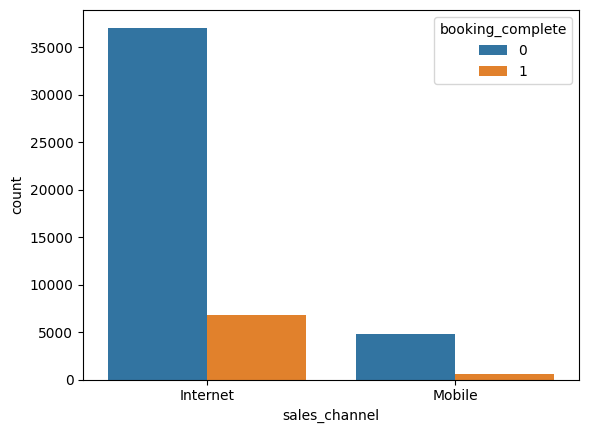

In [254]:
sns.countplot(x='sales_channel',hue='booking_complete',data=df)
plt.show()

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49261 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49261 non-null  int64  
 1   sales_channel          49261 non-null  object 
 2   trip_type              49261 non-null  object 
 3   purchase_lead          49261 non-null  int64  
 4   length_of_stay         49261 non-null  int64  
 5   flight_hour            49261 non-null  int64  
 6   flight_day             49261 non-null  int64  
 7   booking_origin         49261 non-null  object 
 8   wants_extra_baggage    49261 non-null  int64  
 9   wants_preferred_seat   49261 non-null  int64  
 10  wants_in_flight_meals  49261 non-null  int64  
 11  flight_duration        49261 non-null  float64
 12  booking_complete       49261 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 5.3+ MB


In [256]:
encoded_booking_origin = pd.get_dummies(df['booking_origin'], prefix='booking_origin')
encoded_booking_origin = encoded_booking_origin.astype(int)


In [257]:
df=df = pd.concat([df, encoded_booking_origin], axis=1)
df=df.drop('booking_origin',axis=1)

In [258]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,Internet,RoundTrip,262,19,7,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Internet,RoundTrip,112,20,3,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Internet,RoundTrip,243,22,17,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Internet,RoundTrip,96,31,4,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2,Internet,RoundTrip,68,22,15,3,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,1,0,1,...,0,0,0,0,0,0,0,0,0,0
49996,1,Internet,RoundTrip,111,6,4,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,1,Internet,RoundTrip,24,6,22,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
49998,1,Internet,RoundTrip,15,6,11,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49261 entries, 0 to 49999
Columns: 116 entries, num_passengers to booking_origin_Vietnam
dtypes: float64(1), int32(104), int64(9), object(2)
memory usage: 24.4+ MB


In [260]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [261]:
x_test

array([[1, 'Internet', 'RoundTrip', ..., 0, 0, 0],
       [1, 'Internet', 'RoundTrip', ..., 0, 0, 0],
       [4, 'Internet', 'RoundTrip', ..., 0, 0, 0],
       ...,
       [5, 'Internet', 'RoundTrip', ..., 0, 0, 0],
       [1, 'Internet', 'RoundTrip', ..., 0, 0, 0],
       [1, 'Internet', 'RoundTrip', ..., 0, 0, 0]], dtype=object)

In [262]:
sc=StandardScaler()
x_train[:,[0,11,3,4,5,6,]]=sc.fit_transform(x_train[:,[0,11,3,4,5,6]])
x_test[:,[0,11,3,4,5,6,]]=sc.transform(x_test[:,[0,11,3,4,5,6]])

In [263]:
cols=[1,2]
ct=ColumnTransformer(transformers=[('encoder', OrdinalEncoder(), cols)], remainder='passthrough')
x_train=ct.fit_transform(x_train)
x_test=ct.transform(x_test)

In [264]:
x_test[:5]

array([[0.0, 2.0, -0.5800203618151143, 2.9309869517246616,
        0.14723123304604843, 1.6527520967028726, 1.5967423887999306, 1,
        0, 1, 8.83, -0.4207860880538252, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0.0, 2.0, -0.5800203618151143, -0.8396663857372578,
        0.11736754258784937, -0.9349556988237041, -0.918831601961757, 0,
        1, 1, 5.62, -0.4207860880538252, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [265]:
rf=RandomForestClassifier(n_estimators=30,max_depth=2,min_samples_split=3,max_leaf_nodes=5,random_state=42)
model=rf.fit(x_train,y_train)
y_pred=model.predict(x_test)

c:\Users\knigh\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [266]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [267]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
accuracy_score(y_test,y_pred)

0.9914067257595236

In [268]:
confusion_matrix(y_test,y_pred)

array([[14652,     0],
       [  127,     0]], dtype=int64)

In [269]:
roc_auc_score(y_test,y_pred)

0.5

In [270]:
classification_report(y_test,y_pred)

c:\Users\knigh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\knigh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\knigh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.99      1.00      1.00     14652\n           1       0.00      0.00      0.00       127\n\n    accuracy                           0.99     14779\n   macro avg       0.50      0.50      0.50     14779\nweighted avg       0.98      0.99      0.99     14779\n'

In [271]:
import xgboost as xgb
from imblearn.over_sampling import SMOTE


# Address class imbalance using SMOTE
smote = SMOTE(random_state=42,sampling_strategy=0.5, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

class_ratio = sum(y_train == 0) / sum(y_train == 1)
# Define the XGBoost classifier and set its parameters
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=float(class_ratio)
)

# Fit the classifier on the resampled training data
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred1 = xgb_classifier.predict(x_test)

# Evaluate the model's performance using classification metrics
print(classification_report(y_test, y_pred1))



              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14652
           1       0.54      0.93      0.68       127

    accuracy                           0.99     14779
   macro avg       0.77      0.96      0.84     14779
weighted avg       1.00      0.99      0.99     14779



In [272]:
confusion_matrix(y_test,y_pred1)

array([[14551,   101],
       [    9,   118]], dtype=int64)

In [273]:
roc_auc_score(y_test,y_pred1)

0.9611203006872299

importance = xgb_classifier.feature_importances_

# Create lists of feature names and corresponding importances
features=df.columns
importances = list(importance)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

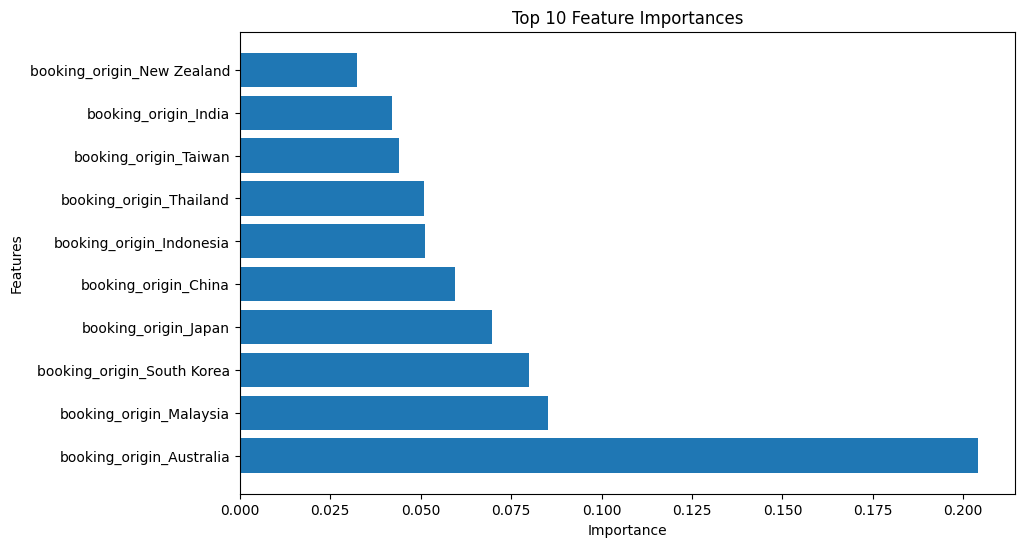

In [274]:
importance = xgb_classifier.feature_importances_

# Create lists of feature names and corresponding importances
features = df.columns
importances = list(importance)

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = np.array(importances)[sorted_indices]
sorted_features = np.array(features)[sorted_indices]

# Plot the top 10 feature importances
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), sorted_importances[:top_n], align='center')
plt.yticks(range(top_n), sorted_features[:top_n])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top {} Feature Importances'.format(top_n))
plt.show()

# Save the top 10 features and their importances in a dictionary for reference
top_features = sorted_features[:top_n]
top_importances = sorted_importances[:top_n]
importance_dict = dict(zip(top_features, top_importances))


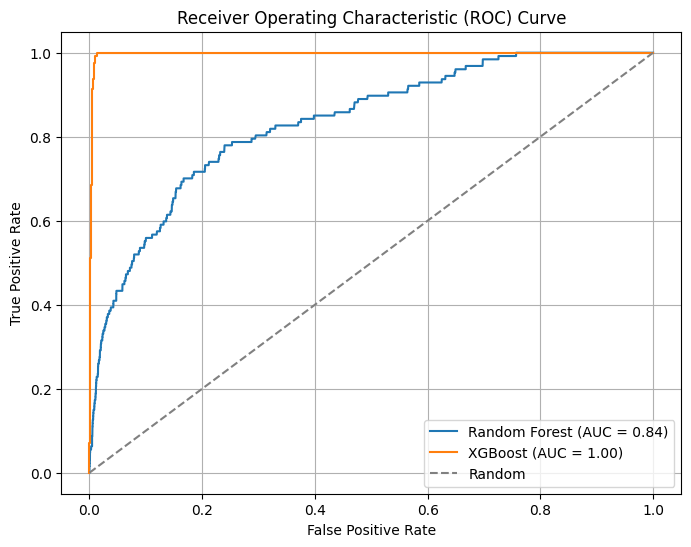

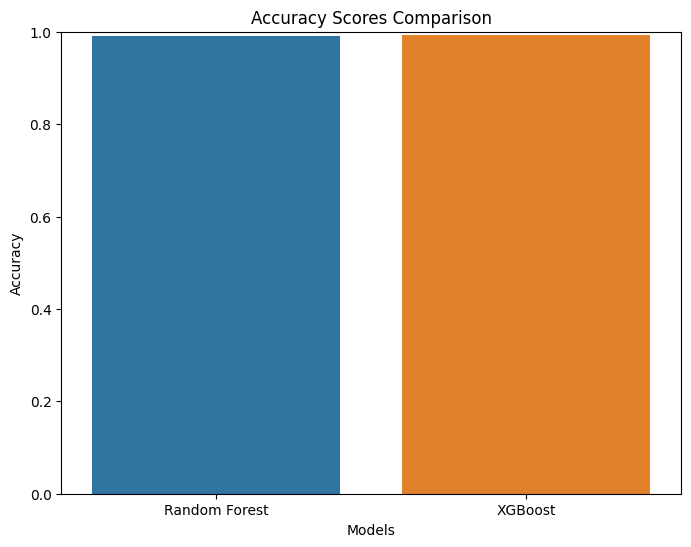

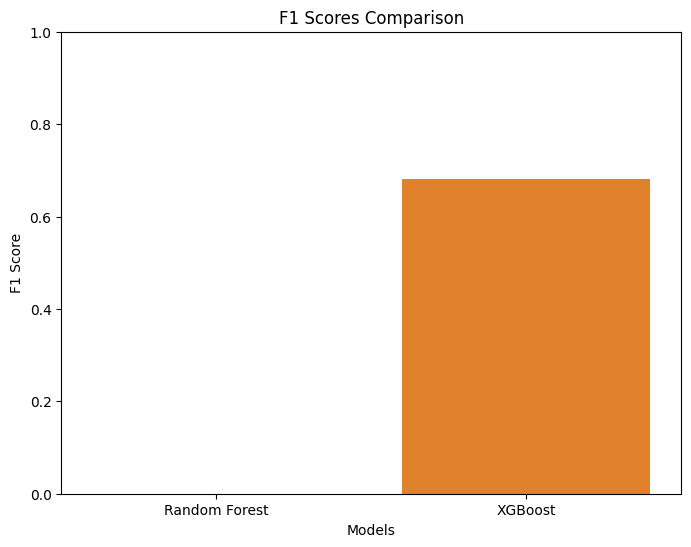

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score

# Assuming you have trained and tested the Random Forest and XGBoost models
# Obtain the predicted probabilities for each model
rf_probs = rf.predict_proba(x_test)[:, 1]
xgb_probs = xgb_classifier.predict_proba(x_test)[:, 1]

# Compute the ROC curve and AUC score for each model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = {:.2f})'.format(xgb_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and plot accuracy and F1 score for each model
rf_accuracy = accuracy_score(y_test, rf.predict(x_test))
rf_f1_score = f1_score(y_test, rf.predict(x_test))

xgb_accuracy = accuracy_score(y_test, xgb_classifier.predict(x_test))
xgb_f1_score = f1_score(y_test, xgb_classifier.predict(x_test))

labels = ['Random Forest', 'XGBoost']
accuracy_scores = [rf_accuracy, xgb_accuracy]
f1_scores = [rf_f1_score, xgb_f1_score]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=accuracy_scores)
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores Comparison')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=f1_scores)
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores Comparison')
plt.show()
